# WhatsApp Group chat analysis of a local running group

Running is supposedly a solitary sport but running groups are very social. We see this in the following analysis of messages from a WhatsApp group. This work requires considerable use of regular expressions. 

In [1]:
#libraries needed
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud

Regular expressions are used to translate nearly free form text into a usable dataframe. The Date_Time column is needed for filtering messages and is turned into the index. 

In [4]:
#%%read file and extract usefule info into a DF
os.chdir('/home/bala/Documents/WhatAppChat')
f = open("WhatsApp Chat with CRPP 1 (1).txt", 'r', encoding='utf8') 
strings = re.findall(r'(\d+/\d+/\d+,\s+\d+:\d+)\s+-\s+(\w+\s+)([\w.]+\s*\w*\s*\w*):(.*)', f.read())
f.close()

MsgTable= pd.DataFrame(strings,columns =['Date_Time', 'CR','Sender', 'Message'])
MsgTable['Date_Time'] = pd.to_datetime(MsgTable['Date_Time'])
MsgTable.set_index(keys='Date_Time', inplace=True)
MsgTable_Oct2017 = MsgTable.loc['2017-10-01, 00:00:00':'2017-10-31, 23:59:59']
MsgTable_noMedia_Oct2017 = MsgTable_Oct2017[-MsgTable_Oct2017['Message'].str.contains("<Media omitted>")]

The posts show the social nature of the group with many messages wishing people for birthdays, running accomplishments etc. Andreas Mueller's excellent implementation of Wordcloud is used along with playful stencils.

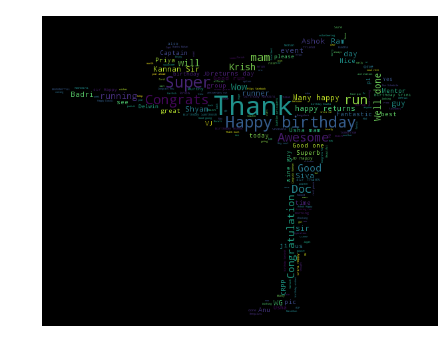

In [5]:
#%%Word cloud of messages
MsgList = MsgTable_noMedia_Oct2017['Message'].tolist()
text = " ".join(MsgList)

stretch_mask = np.array(Image.open("/home/bala/Documents/WhatAppChat/stretch_stencil.jpg"))

# lower max_font_size
wordcloud = WordCloud(max_font_size=40, background_color="black", 
                      max_words=2000, mask=stretch_mask, random_state=19).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In the next image, we see that some group members are more active than others! 

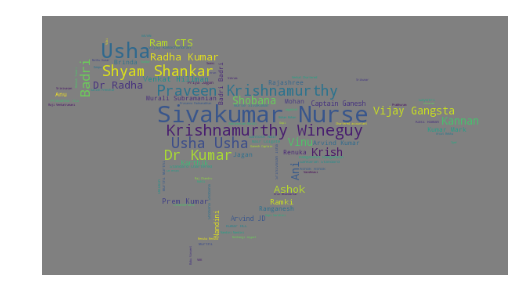

In [8]:
#%%Word cloud of senders
# Read the whole text.
MsgList = MsgTable_noMedia_Oct2017['Sender'].tolist()
text = " ".join(MsgList)

horse_mask = np.array(Image.open("/home/bala/Documents/WhatAppChat/galloping_horse1.jpg"))

# lower max_font_size
wordcloud = WordCloud(max_font_size=40, background_color="grey", 
                      max_words=2000, mask=horse_mask, random_state=9).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()